In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
print("Training data shape:", df_train.shape)
print("Testing data shape:", df_test.shape)

Training data shape: (22083, 45)
Testing data shape: (9465, 43)


In [3]:
cols_to_drop = ["Patient Id", "Family Name", "Patient First Name", "Father's name",
                 "Institute Name", "Location of Institute", "Place of birth",
                 "Parental consent", "Follow-up"]

df_train.drop(columns=cols_to_drop, axis=1, inplace=True)
df_test.drop(columns=cols_to_drop, axis=1, inplace=True)

In [4]:
catecols=["Genes in mother's side", "Inherited from father", 'Maternal gene',
       'Paternal gene', 'Status','Gender',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min','Birth asphyxia',
       'Autopsy shows birth defect (if applicable)','Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse',
       'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies','Birth defects', 'Blood test result']

x=df_train.groupby('Genetic Disorder')['Disorder Subclass'].apply(set)
y=dict(x)
df_train = df_train[df_train['Disorder Subclass'].notna()]

d={}
for i in range(len(x)):
  x[i]=list(x[i])
  for j in x[i]:
    d[j]=x.index[i]

disorder=d

import math
df_train['Genetic Disorder'] = df_train.apply(
    lambda row: disorder[row['Disorder Subclass']] if pd.isna(row['Genetic Disorder']) else row['Genetic Disorder'],
    axis=1
)

f = lambda x: x.mean() if np.issubdtype(x.dtype, np.number) else x.mode().iloc[0]
df_train = df_train.fillna(df_train.groupby(['Disorder Subclass']).transform(f))



C:\Users\tapos\AppData\Local\Temp\ipykernel_6920\3519639694.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x[i]=list(x[i])
C:\Users\tapos\AppData\Local\Temp\ipykernel_6920\3519639694.py:15: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  x[i]=list(x[i])
C:\Users\tapos\AppData\Local\Temp\ipykernel_6920\3519639694.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for j in x[i]:
C:\Users\tapos\AppData\Local\Temp\ipykernel_6

In [5]:
df_test=df_test.replace(' ',None)
testf= {'Patient Age': 4.0, "Genes in mother's side": 'Yes', 'Inherited from father': 'No', 'Maternal gene': 'Yes', 'Paternal gene': 'No', 'Blood cell count (mcL)': 4.898916949522597, "Mother's age": '23.0', "Father's age": '20.0', 'Respiratory Rate (breaths/min)': 'Normal (30-60)', 'Heart Rate (rates/min': 'Normal', 'Test 1': 0.0, 'Test 2': 0.0, 'Test 3': 0.0, 'Test 4': 1.0, 'Test 5': 0.0, 'Parental consent': 'Yes', 'Follow-up': 'Low', 'Gender': 'Ambiguous', 'Birth asphyxia': 'Yes', 'Autopsy shows birth defect (if applicable)': 'Not applicable', 'Folic acid details (peri-conceptional)': 'Yes', 'H/O serious maternal illness': 'No', 'H/O radiation exposure (x-ray)': 'Not applicable', 'H/O substance abuse': '-', 'Assisted conception IVF/ART': 'Yes', 'History of anomalies in previous pregnancies': 'Yes', 'No. of previous abortion': 2.0, 'Birth defects': 'Singular', 'White Blood cell count (thousand per microliter)': '7.486223987209439', 'Blood test result': 'slightly abnormal', 'Symptom 1': 1.0, 'Symptom 2': 1.0, 'Symptom 3': 1.0, 'Symptom 4': 0.0, 'Symptom 5': 0.0}
df_test=df_test.fillna(value=testf)

In [6]:
# df_train.drop("Genetic Disorder",axis=1,inplace=True)

In [7]:
df_train["Disorder Subclass"]=[1 if i.strip()== "Leber's hereditary optic neuropathy"
                                else 0 if i.strip() == "Cystic fibrosis"
                               else 2 if i.strip()=="Diabetes"
                               else 3 if i.strip()=="Leigh syndrome"
                               else 4 if i.strip()=="Cancer"
                               else 5 if i.strip()=="Tay-Sachs"
                               else 6 if i.strip()=="Hemochromatosis"
                               else 7 if i.strip()=="Mitochondrial myopathy"
                               else 8 for i in df_train["Disorder Subclass"]]

In [8]:
# catecols=["Genes in mother's side", "Inherited from father", 'Maternal gene',
#        'Paternal gene','Respiratory Rate (breaths/min)','Heart Rate (rates/min','Birth asphyxia',
#        'Autopsy shows birth defect (if applicable)','Folic acid details (peri-conceptional)',
#        'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse','Assisted conception IVF/ART',
#        'History of anomalies in previous pregnancies','Birth defects','Blood test result','Status','Gender']

catecols=["Genes in mother's side", "Inherited from father", 'Maternal gene',
       'Paternal gene', 'Genetic Disorder',
       'Respiratory Rate (breaths/min)','Heart Rate (rates/min','Birth asphyxia',
       'Autopsy shows birth defect (if applicable)','Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse',
       'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies','Birth defects', 'Blood test result','Status','Gender']

one_hot_encoded_data = pd.get_dummies(df_train, columns = catecols)

df_train=one_hot_encoded_data
df_train

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,...,Birth defects_Singular,Blood test result_abnormal,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal,Status_Alive,Status_Deceased,Gender_Ambiguous,Gender_Female,Gender_Male
0,2.0,4.760603,34.978814,42.159184,0,0,0,1,0,1.971039,...,False,False,False,False,True,True,False,False,False,True
1,4.0,4.910669,34.661983,23.0,0,0,0,1,0,2.01242,...,False,False,False,True,False,False,True,True,False,False
2,6.0,4.893297,41.0,22.0,0,0,0,1,0,4.0,...,True,False,False,True,False,True,False,True,False,False
3,12.0,4.705280,21.0,41.689446,0,0,0,1,0,1.0,...,True,False,True,False,False,False,True,False,False,True
4,11.0,4.720703,32.0,40.971429,0,0,0,1,0,4.0,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,4.0,5.258298,35.0,64.0,0,0,0,1,0,3.0,...,False,False,True,False,False,False,True,False,True,False
22079,8.0,4.974220,34.684094,56.0,0,0,0,1,0,2.0,...,False,False,True,False,False,True,False,True,False,False
22080,8.0,5.186470,35.0,51.0,0,0,0,1,0,2.0,...,True,False,False,True,False,False,True,False,False,True
22081,7.0,4.858543,19.0,41.689446,0,0,0,1,0,1.0,...,False,True,False,False,False,True,False,False,False,True


In [9]:
df_train = df_train.apply(pd.to_numeric,downcast="float")

In [10]:

df_train["sum of Mother's and fathers age avg"]=(df_train["Mother's age"]+df_train["Father's age"]) / 2
df_train["total symptom"]=(df_train["Symptom 1"]+df_train["Symptom 2"]+df_train["Symptom 3"]+df_train["Symptom 4"]+df_train["Symptom 5"]) / 5
df_train["total test"]=(df_train["Test 1"]+df_train["Test 2"]+df_train["Test 3"]+df_train["Test 4"]+df_train["Test 5"])

In [11]:
cols_names=['Blood cell count (mcL)','White Blood cell count (thousand per microliter)','No. of previous abortion']

x,y = df_train.loc[:,df_train.columns != 'Disorder Subclass'], df_train.loc[:,'Disorder Subclass']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (11949, 68)
Validation data shape: (3983, 68)
Testing data shape: (3983, 68)
Training labels shape: (11949,)
Validation labels shape: (3983,)
Testing labels shape: (3983,)


In [12]:
sc = MinMaxScaler()
x_train = sc.fit_transform(X_train[cols_names])
x_test = sc.transform(X_test[cols_names])
x_val = sc.transform(X_val[cols_names])

X_test[cols_names]=x_test
X_train[cols_names]=x_train
X_val[cols_names]=x_val

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_test_1 = {
    'learning_rate': [0.01, 0.001],
    'n_estimators': [100, 1000, 1500],
    'max_depth':[2,4]
}

gb = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_test_1,
    scoring='accuracy',   # or 'roc_auc', 'f1', etc.
    cv=2,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best model and parameters
model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)


Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1500}
Best CV score: 0.8809103044854061


Validation Set Evaluation:
Accuracy: 0.8875219683655536
Precision: 0.888850867964566
Recall: 0.8875219683655536
F1 Score: 0.8855820094939739
              precision    recall  f1-score   support

         0.0     0.9806    0.9833    0.9820       720
         1.0     0.8992    0.9134    0.9062       127
         2.0     0.9574    1.0000    0.9782       337
         3.0     0.8487    0.8774    0.8628      1036
         4.0     1.0000    1.0000    1.0000        23
         5.0     0.8283    0.9382    0.8798       550
         6.0     0.8878    0.6421    0.7452       271
         7.0     0.8649    0.8288    0.8465       888
         8.0     1.0000    0.5161    0.6809        31

    accuracy                         0.8875      3983
   macro avg     0.9185    0.8555    0.8757      3983
weighted avg     0.8889    0.8875    0.8856      3983

Confusion Matrix:


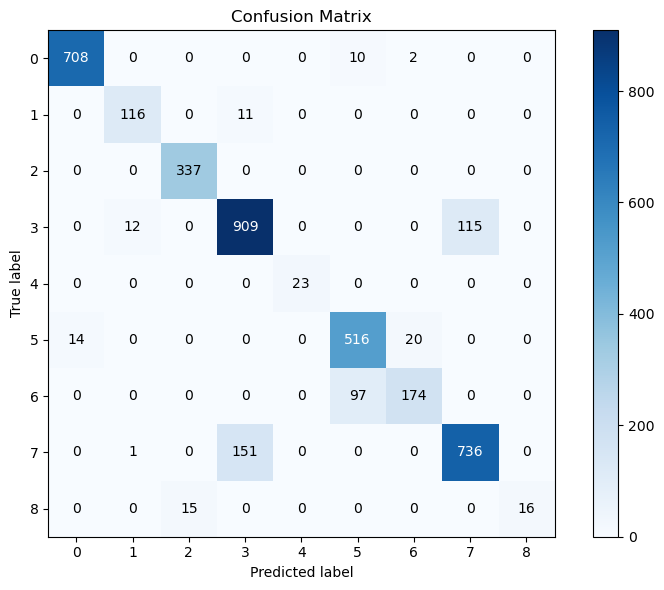

In [14]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score , recall_score , precision_score , f1_score

print("Validation Set Evaluation:")
y_val_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_val_pred, average='weighted'))
print("F1 Score:", f1_score(y_val, y_val_pred, average='weighted'))
print(classification_report(y_val, y_val_pred, digits=4))

print("Confusion Matrix:")

plt.figure(figsize=(8,6))

conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(conf_matrix.shape[0])
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

# Add values inside the cells
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(
            j, i, conf_matrix[i, j],
            ha="center", va="center",
            color="white" if conf_matrix[i, j] > conf_matrix.max()/2 else "black"
        )

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


Test Set Evaluation:
Accuracy: 0.8892794376098418
Precision: 0.8895647257719732
Recall: 0.8892794376098418
F1 Score: 0.8879092165647502
              precision    recall  f1-score   support

         0.0     0.9784    0.9841    0.9812       690
         1.0     0.9310    0.9474    0.9391       114
         2.0     0.9617    1.0000    0.9805       352
         3.0     0.8498    0.8680    0.8588      1030
         4.0     1.0000    1.0000    1.0000        17
         5.0     0.8529    0.9305    0.8900       561
         6.0     0.8733    0.6993    0.7767       276
         7.0     0.8559    0.8333    0.8444       912
         8.0     1.0000    0.5484    0.7083        31

    accuracy                         0.8893      3983
   macro avg     0.9226    0.8679    0.8866      3983
weighted avg     0.8896    0.8893    0.8879      3983

Confusion Matrix:


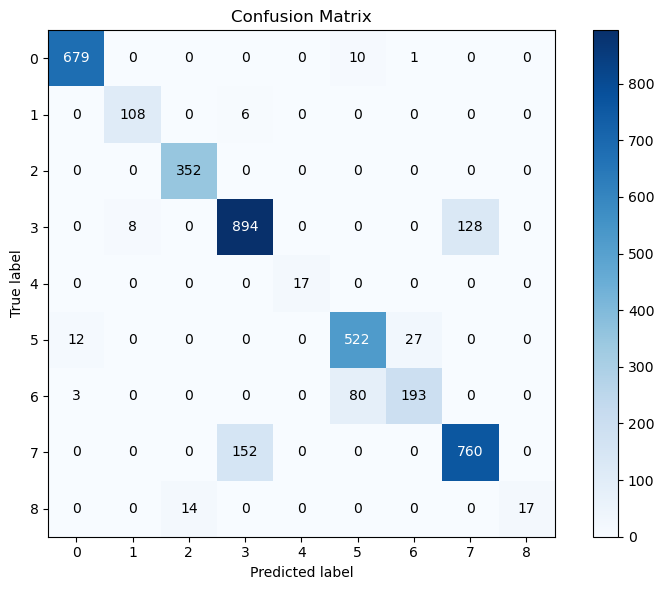

In [15]:
print("Test Set Evaluation:")
y_test_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print(classification_report(y_test, y_test_pred, digits=4))

print("Confusion Matrix:")
plt.figure(figsize=(8,6))

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(conf_matrix.shape[0])
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

# Add numbers to each cell
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(
            j, i, conf_matrix[i, j],
            ha="center", va="center",
            color="white" if conf_matrix[i, j] > conf_matrix.max()/2 else "black"
        )

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()